**B03 Team Members:**   Himani Tyagi,    Jaishankar Govindaraj,    Leonardo Trucios Cevasco,    Srithijaa Sankepally,    Yumeng (Emelyn) Tang

# **Summary of the Assignment**

**Project title :** Global Pandemic & The Government - COVID-19 Impact On Boston Government Employees Earnings

**Problem Definition:** Evaluate the Boston government sector to understand the impact of the global pandemic, COVID-19, on the employees’ earnings. 
The main topics that we will focus on covering are the followings: 

1. Examine the data across years preceding, during, and following the pandemic to assess whether there have been any effects on both earnings and the workforce.
2. Explore which job levels/positions have recorded the highest earnings, and which department have recorded the highest number of employees
3. Determine which income component has the most impact on an employee’s gross earnings.
4. Construct patterns from data collected across various Boston areas/zip codes.

**Data:** For the developement of this project we have used two datasets from two different sources.

1. Boston Government - Office of Human Resources: https://data.boston.gov/dataset/employee-earnings-report
  * The City of Boston releases an annual dataset containing payroll information for its employees, encompassing employee names, job details, and earnings breakdown, including base salary, overtime, and total compensation. To conduct a comprehensive analysis, we are using the dataset spanning the years 2018, 2019, 2020, 2021, and 2022. This resource, offers citizens valuable insights into the financial aspects of the City's workforce during these specific years.

2. United States Zip Codes - Massachusetts: https://www.unitedstateszipcodes.org/ma/
  * This dataset provides zip code information for Massachusetts, including key details such as zip code, type, primary city, state, county, timezone, latitude, longitude among others. It offers a concise and comprehensive snapshot of geographic and locational attributes associated with each zip code in the state of Massachusetts. By incorporating this dataset, the project can be analyzed in a location-wise level.


**Motivation :** Government jobs tend to be secure because they are essential for the functioning of society and are less influenced by market fluctuations compared to private sector. We aim to provide insights into Boston’s government sector for our peers with potential interest.

**Executive Summary:** This project assesses the effects of the COVID-19 pandemic on earnings in the Boston government sector. Utilizing datasets from 2018 to 2022, sourced from Boston Government's payroll records and Massachusetts zip code information, the study evaluates changes in workforce and earnings during the pre-pandemic, pandemic, and post-pandemic periods. Key objectives include identifying top-earning job levels, determining departments with the highest employee numbers, and analyzing income components impacting gross earnings. Emphasis is placed on constructing patterns across Boston areas and zip codes. Motivated by the stability of government jobs, our project aims to provide insights into Boston's government workforce over the last five years, which can be a source of interest for our peers.

# **Description of the Datasets**

## Description for Boston Government - Office of Human Resources Dataset

### Dictionary

*   **Name:** Full name of each government employee

*  **Department_Name:** The department in which the employee works

*   **Title:** The job title or position held by the employee

*   **Regular:** Regular earnings or base salary of the employee

*   **Retro:** Retroactive pay, if any, received by the employee. This concept refers to compensation added to an employee's paycheck to make up for a compensation shortfall in a previous pay period

*   **Other:** Additional earnings or extraordinary income for the employee. This type of compensation may consist of various supplementary forms of compensation, including bonuses, allowances, or reimbursement expenses

*   **Overtime:** Overtime payments received by the employee

*   **Injured:** Earnings related to injury, if applicable

*   **Detail:** Additional details payments or special job-related earnings

*   **Quinn Education:**  Earnings related to educational incentives or allowances

*   **Total Gross:** The total earnings of the employee, including regular, retro, other, overtime, injured, detail, and education earnings.

*   **Postal:** The zip code associated with the employee's location

*   **Year:** The year for which the earnings data is reported


### Basic Information for the concatenated dataset from 2018-2022 tables

* There are a total of 114147 rows
* There are a total of 12 columns
* Null values: 
    * Zip_code column returned 93 null values
    * Columns like regular, retro, other, overtime, injured, detail and education represent income components, hence, null values are taken as USD 0, which means that there has been no contribution towards that component

## United States Zip Codes - Massachusetts

### Dictionary

*   **zip:** The ZIP code, a numerical code used in postal addresses to facilitate mail delivery

*  **type:** The type of address associated with the ZIP code (e.g., STANDARD for standard delivery or PO BOX for a post office box address)

*   **primary_city:** The primary city or locality associated with the ZIP code

*   **state:**  The state in which the ZIP code is located (in this case, MA for Massachusetts)

*   **county:** The county to which the ZIP code belongs (e.g., Plymouth County)

*   **timezone:** The timezone of the area covered by the ZIP code (e.g., America/New_York)

*   **world_region:** The world region or continent to which the ZIP code is geographically associated (in this case, NA for North America)

*   **country:** The country to which the ZIP code belongs (in this case, US for the United States)

*   **latitude:** The geographic latitude coordinates of the ZIP code location

*   **longitude:** The geographic longitude coordinates of the ZIP code location

# **Entity Relationship Diagram**

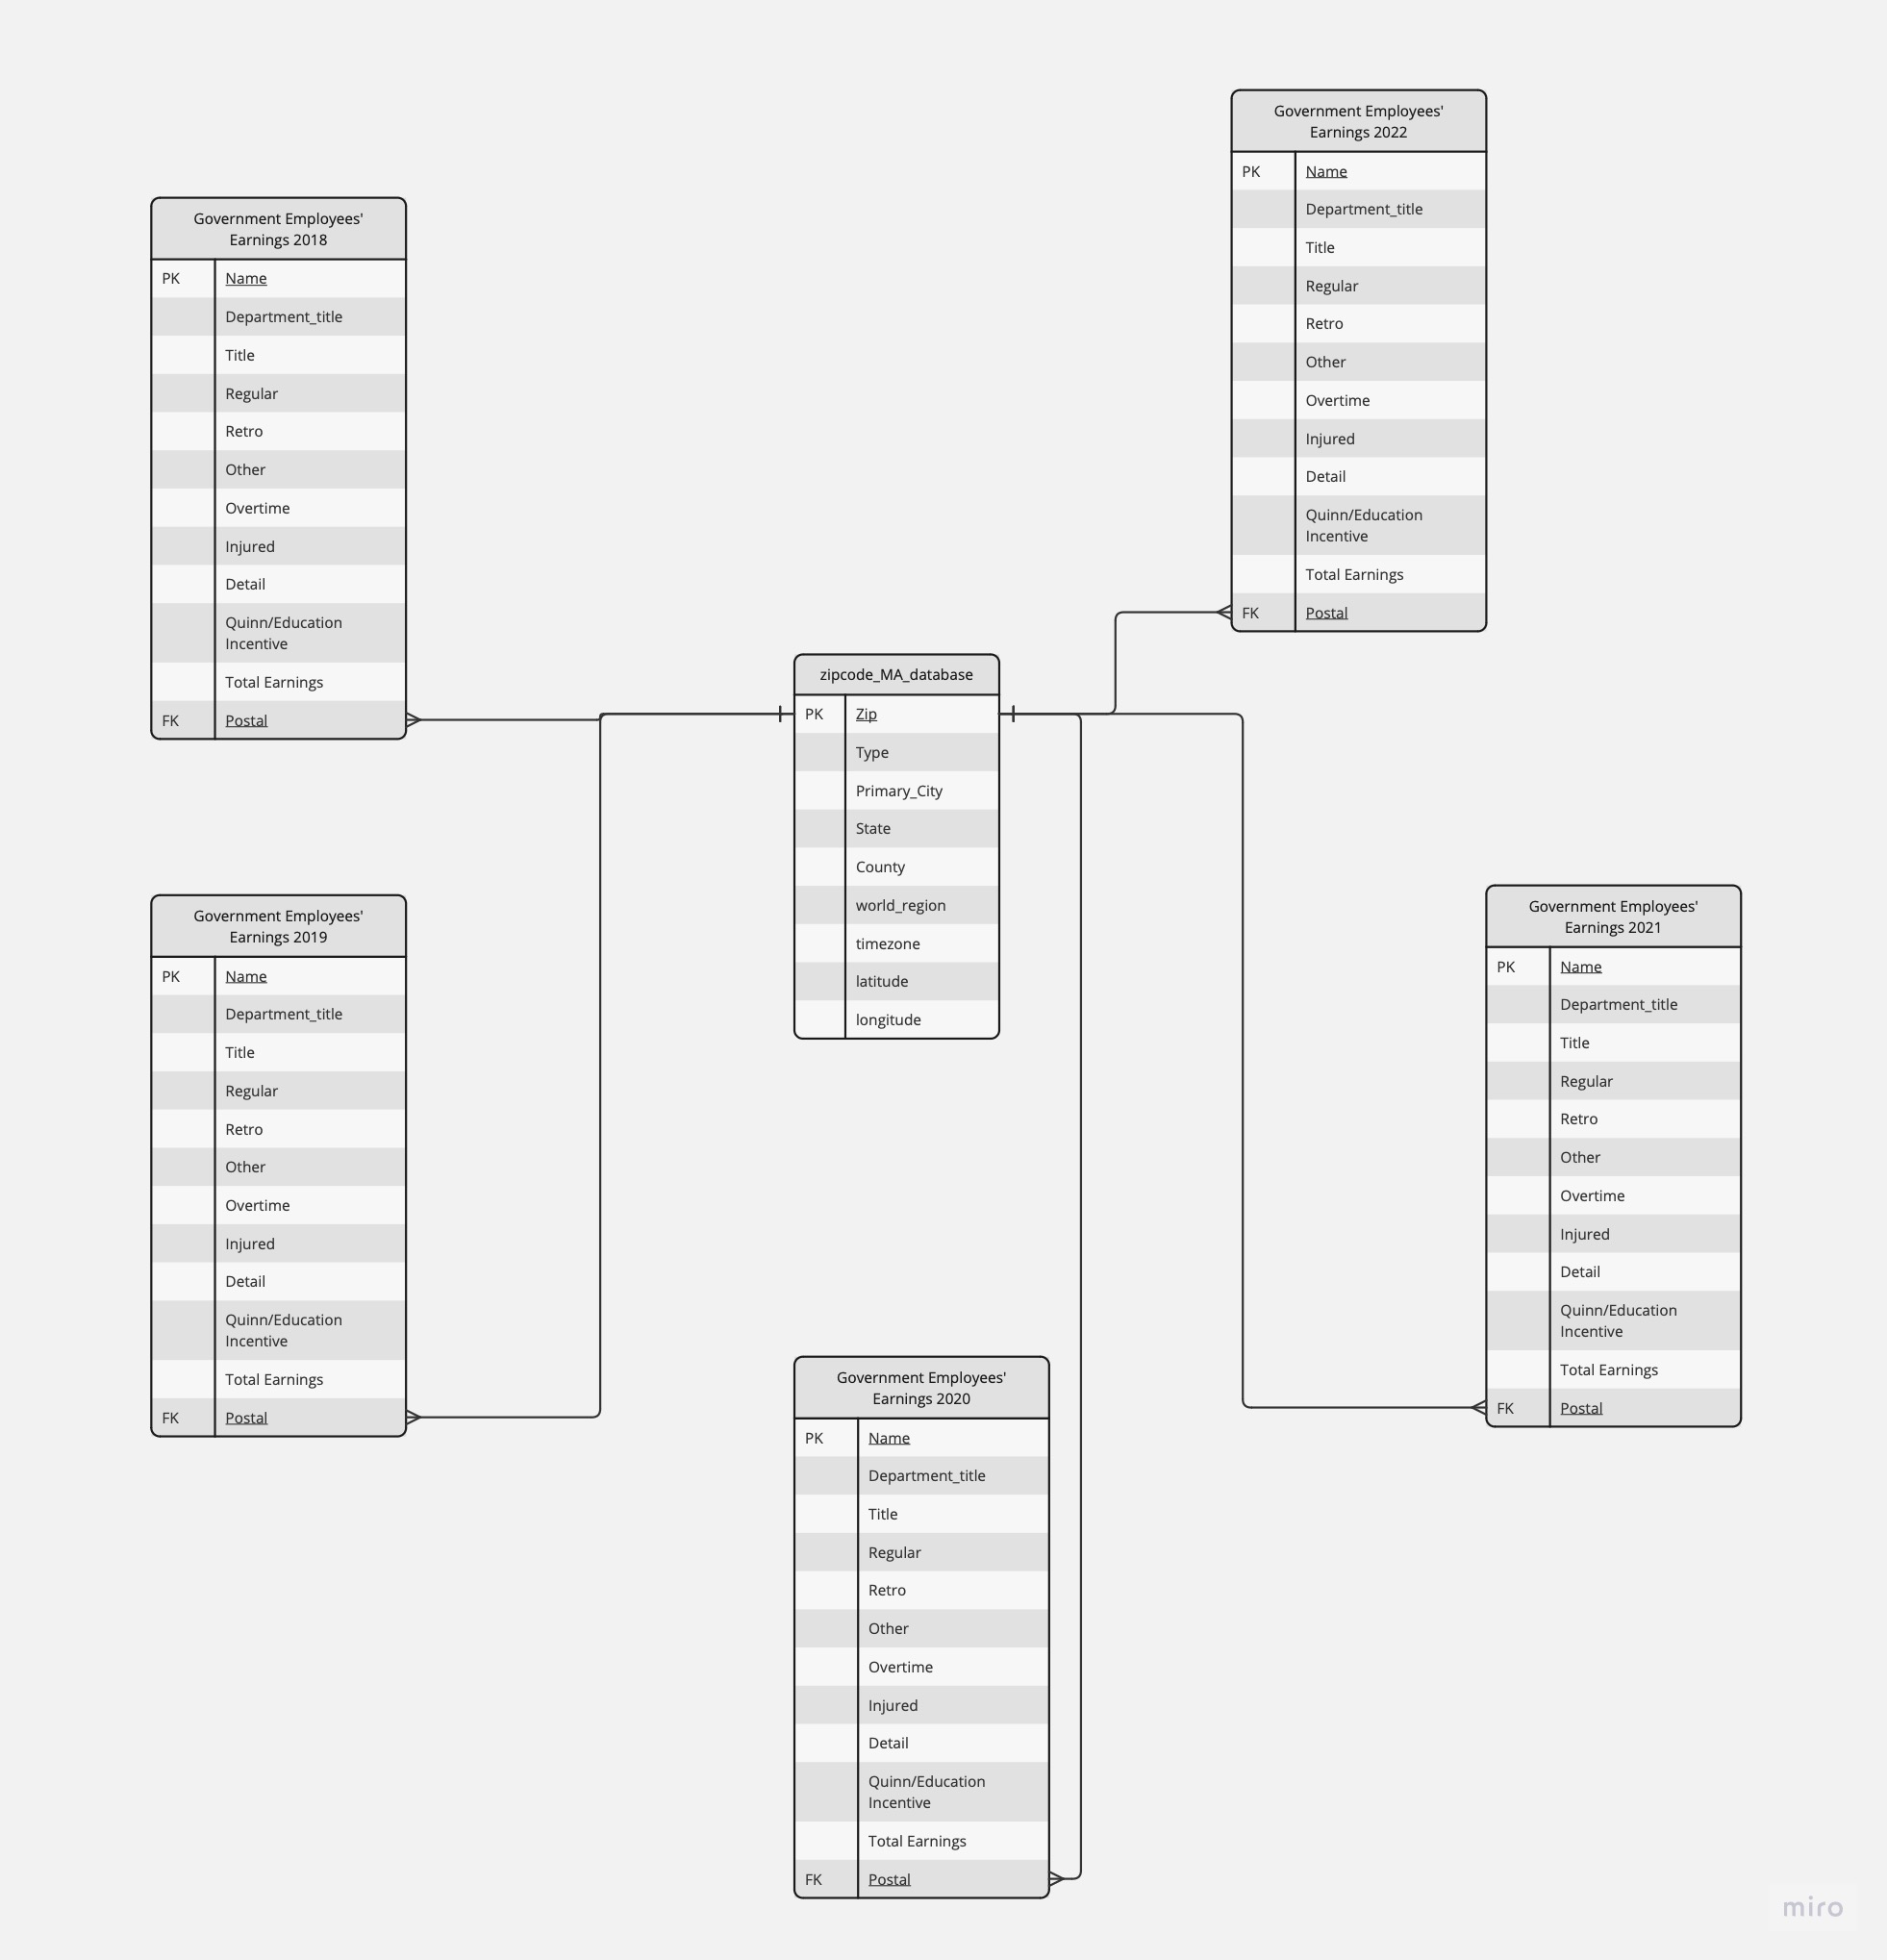

# **Exploratory Data Analysis**

## Data Preparation

Before doing all the data cleaning, we checked the dataset for duplicate entries and dropped them, so we can have 1 unique entry for each of the 5 tables that represent the payrolls for 2018, 2019, 2020, 2021, and 2022. While doing this, we are saving the results as a new table for each of the years. 

In [1]:
%%bigquery
CREATE OR REPLACE TABLE `ba-775-b03.BA_775_Dataset.2022_unique`AS
SELECT *
FROM (
    SELECT *,
           ROW_NUMBER() OVER (PARTITION BY NAME ORDER BY NAME) AS row_num
    FROM `ba-775-b03.BA_775_Dataset.2022` 
) AS subquery
WHERE row_num = 1;

Query is running:   0%|          |

""


The table that has information of the payroll in 2022, has 23,204 observations, but only 23,133 are distinct, so we will drop 73 observations

In [2]:
%%bigquery
CREATE OR REPLACE TABLE `ba-775-b03.BA_775_Dataset.2021_unique`AS
SELECT *
FROM (
    SELECT *,
           ROW_NUMBER() OVER (PARTITION BY NAME ORDER BY NAME) AS row_num
    FROM `ba-775-b03.BA_775_Dataset.2021` 
) AS subquery
WHERE row_num = 1;

Query is running:   0%|          |

""


The table that has information of the payroll in 2021, has 22,546 observations, but only 22,472 are distinct, so we will drop 74 observations

In [3]:
%%bigquery
CREATE OR REPLACE TABLE `ba-775-b03.BA_775_Dataset.2020_unique`AS
SELECT *
FROM (
    SELECT *,
           ROW_NUMBER() OVER (PARTITION BY NAME ORDER BY NAME) AS row_num
    FROM `ba-775-b03.BA_775_Dataset.2020` 
) AS subquery
WHERE row_num = 1;

Query is running:   0%|          |

""


The table that has information of the payroll in 2020, has 21,858 observations, but only 21,785 are distinct, so we will drop 73 observations

In [4]:
%%bigquery
CREATE OR REPLACE TABLE `ba-775-b03.BA_775_Dataset.2019_unique`AS
SELECT *
FROM (
    SELECT *,
           ROW_NUMBER() OVER (PARTITION BY NAME ORDER BY NAME) AS row_num
    FROM `ba-775-b03.BA_775_Dataset.2019` 
) AS subquery
WHERE row_num = 1;

Query is running:   0%|          |

""


The table that has information of the payroll in 2019, has 23,312 observations, but only 23,232 are distinct, so we will drop 80 observations

In [5]:
%%bigquery
CREATE OR REPLACE TABLE `ba-775-b03.BA_775_Dataset.2018_unique`AS
SELECT *
FROM (
    SELECT *,
           ROW_NUMBER() OVER (PARTITION BY NAME ORDER BY NAME) AS row_num
    FROM `ba-775-b03.BA_775_Dataset.2018` 
) AS subquery
WHERE row_num = 1;

Query is running:   0%|          |

""


The table that has information of the payroll in 2018, has 23,603 observations, but only 23,525 are distinct, so we will drop 78 observations

## Merging the Datasets

After cleaning the dataset for duplicates, we merged all the distinct data from years 2018 to 2022. We are saving the merged data under the table named "data_merged_raw". We created this new table for ease of working

In [6]:
%%bigquery 

CREATE OR REPLACE TABLE `ba-775-b03.BA_775_Dataset.data_merged_raw` AS

(SELECT
  REPLACE(CAST(NAME AS STRING), ',', ' ') AS name,
  DEPARTMENT_NAME AS department_name,
  TITLE AS job_title,
  CAST(REGULAR AS FLOAT64) AS regular,
  CAST(RETRO AS FLOAT64) AS retro,
  CAST(OTHER AS FLOAT64) AS other,
  CAST(OVERTIME AS FLOAT64) AS overtime,
  CAST(INJURED AS FLOAT64) AS injured,
  CAST(DETAIL AS FLOAT64) AS detail,
  CAST(QUINN_EDUCATION AS FLOAT64) AS education,
  CAST(TOTAL__GROSS AS FLOAT64) AS total_earnings,
  CAST(POSTAL AS TINYINT) AS zip_code,
  2022 AS year
FROM
  `ba-775-b03.BA_775_Dataset.2022_unique`


UNION ALL


SELECT
  REPLACE(CAST(NAME AS STRING), ',', ' ') AS name,
  DEPARTMENT_NAME AS department_name,
  TITLE AS job_title,
  CAST(REGULAR AS FLOAT64) AS regular,
  CAST(RETRO AS FLOAT64) AS retro,
  CAST(OTHER AS FLOAT64) AS other,
  CAST(OVERTIME AS FLOAT64) AS overtime,
  CAST(INJURED AS FLOAT64) AS injured,
  CAST(DETAIL AS FLOAT64) AS detail,
  CAST(QUINN_EDUCATION_INCENTIVE AS FLOAT64) AS education,
  CAST(TOTAL_GROSS AS FLOAT64) AS total_earnings,
  CAST(POSTAL AS TINYINT) AS zip_code,
  2021 AS year
FROM
  `ba-775-b03.BA_775_Dataset.2021_unique`


UNION ALL


SELECT
  REPLACE(CAST(NAME AS STRING), ',', ' ') AS name,
  DEPARTMENT_NAME AS department_name,
  TITLE AS job_title,
  CAST(_REGULAR_ AS FLOAT64) AS regular,
  CAST(_RETRO_ AS FLOAT64) AS retro,
  CAST(_OTHER_ AS FLOAT64) AS other,
  CAST(_OVERTIME_ AS FLOAT64) AS overtime,
  CAST(_INJURED_ AS FLOAT64) AS injured,
  CAST(_DETAIL_ AS FLOAT64) AS detail,
  CAST(_QUINN___EDUCATION_INCENTIVE_ AS FLOAT64) AS education,
  CAST(_TOTAL_EARNINGS_ AS FLOAT64) AS total_earnings,
  CAST(POSTAL AS TINYINT) AS zip_code,
  2020 AS year
FROM
  `ba-775-b03.BA_775_Dataset.2020_unique`


UNION ALL


SELECT
  REPLACE(CAST(NAME AS STRING), ',', ' ') AS name,
  DEPARTMENT_NAME AS department_name,
  TITLE AS job_title,
  CAST(_REGULAR_ AS FLOAT64) AS regular,
  CAST(_RETRO_ AS FLOAT64) AS retro,
  CAST(_OTHER_ AS FLOAT64) AS other,
  CAST(_OVERTIME_ AS FLOAT64) AS overtime,
  CAST(_INJURED_ AS FLOAT64) AS injured,
  CAST(_DETAIL_ AS FLOAT64) AS detail,
  CAST(_QUINN_EDUCATION_INCENTIVE_ AS FLOAT64) AS education,
  CAST(TOTAL_EARNINGS AS FLOAT64) AS total_earnings,
  CAST(POSTAL AS TINYINT) AS zip_code,
  2019 AS year
FROM
  `ba-775-b03.BA_775_Dataset.2019_unique`


UNION ALL


SELECT
  REPLACE(CAST(NAME AS STRING), ',', ' ') AS name,
  DEPARTMENT_NAME AS department_name,
  TITLE AS job_title,
  CAST(REGULAR AS FLOAT64) AS regular,
  CAST(RETRO AS FLOAT64) AS retro,
  CAST(OTHER AS FLOAT64) AS other,
  CAST(OVERTIME AS FLOAT64) AS overtime,
  CAST(INJURED AS FLOAT64) AS injured,
  CAST(DETAIL AS FLOAT64) AS detail,
  CAST(QUINN_EDUCATION_INCENTIVE AS FLOAT64) AS education,
  CAST(TOTAL_EARNINGS AS FLOAT64) AS total_earnings,
  CAST(POSTAL AS TINYINT) AS zip_code,
  2018 AS year
FROM
  `ba-775-b03.BA_775_Dataset.2018_unique`);

Query is running:   0%|          |

""


Below is a snapshot of the new merged table with payroll data from 2018 to 2022

In [7]:
%%bigquery
SELECT*
FROM `ba-775-b03.BA_775_Dataset.data_merged_raw`

Query is running:   0%|          |

Downloading:   0%|          |

,name,department_name,job_title,regular,retro,other,overtime,injured,detail,education,total_earnings,zip_code,year
0,Conlin Jane F,BPS Health Service,Nurse,115017.59,NaN,NaN,NaN,NaN,NaN,NaN,115017.59,<NA>,2020
1,Figueroa Tyrone Anthony,BPS East Boston High,Teacher,105919.38,NaN,1000.00,NaN,NaN,NaN,NaN,106919.38,<NA>,2020
2,Torres Lucy Levana,Lyon Pilot High 9-12,Teacher,92688.76,NaN,1934.29,NaN,NaN,NaN,NaN,94623.05,<NA>,2020
3,Jean Maryse,Newcomers Academy,Teacher,122855.00,NaN,2964.88,NaN,NaN,NaN,NaN,125819.88,<NA>,2020
4,Mroz Joel P,BPS Ellis Elementary,Teacher,20405.78,NaN,NaN,NaN,NaN,NaN,NaN,20405.78,<NA>,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114142,Danilecki John H,Boston Police Department,Police Captain,157595.81,NaN,24504.13,49388.68,6504.89,64800.0,41025.08,343818.59,2559,2021
114143,Bannish Kaitlynn,BPS Special Education,ABA Specialist (BTU),55716.60,NaN,NaN,NaN,NaN,NaN,NaN,55716.60,2815,2020
114144,Bannish Kaitlynn,BPS Special Education,ABA Specialist (BTU),48156.31,1399.39,NaN,NaN,NaN,NaN,NaN,49555.70,2815,2018
114145,Bannish Kaitlynn,BPS Special Education,ABA Specialist (BTU),49985.66,984.72,346.50,NaN,NaN,NaN,NaN,51316.88,2815,2019


Here we are checking for how many null values we have in each field

In [8]:
%%bigquery
SELECT
  COUNTIF(name IS NULL) AS name,
  COUNTIF(department_name IS NULL) AS department_name,
  COUNTIF(job_title IS NULL) AS job_title,
  COUNTIF(regular IS NULL) AS regular,
  COUNTIF(retro IS NULL) AS retro,
  COUNTIF(other IS NULL) AS other,
  COUNTIF(overtime IS NULL) AS overtime,
  COUNTIF(injured IS NULL) AS injured,
  COUNTIF(detail IS NULL) AS detail,
  COUNTIF(education IS NULL) AS education,
  COUNTIF(total_earnings IS NULL) AS total_earnings,
  COUNTIF(zip_code IS NULL) AS zip_code,
  COUNTIF(year IS NULL) AS year
FROM `ba-775-b03.BA_775_Dataset.data_merged_raw`

Query is running:   0%|          |

Downloading:   0%|          |

,name,department_name,job_title,regular,retro,other,overtime,injured,detail,education,total_earnings,zip_code,year
0,0,0,0,4751,84277,43754,79977,107213,103262,107329,0,93,0


As we can see in the above output, we have null values in the fields related to income components and we also have some null values in the zipcode field. For null values in the income components, which are - "regular", "retro", "other", "overtime", "injured", "detail", "education", we will be replacing them with 0. The reason we are doing this is because, 0 in any of these fields mean that that part of income was not earned by the individual or there hasn't been any contribution made in that area.

In [9]:
%%bigquery
UPDATE `ba-775-b03.BA_775_Dataset.data_merged_raw`
SET
  regular = COALESCE(regular, 0),
  retro = COALESCE(retro, 0),
  other = COALESCE(other, 0),
  overtime = COALESCE(overtime, 0),
  injured = COALESCE(injured, 0),
  detail = COALESCE(detail, 0),
  education = COALESCE(education, 0),
  total_earnings = COALESCE(total_earnings, 0)
WHERE TRUE;

Query is running:   0%|          |

""


We are running the check for null values again to make sure all of them have been replaced by 0, except from zip_code

In [10]:
%%bigquery
SELECT
  COUNTIF(name IS NULL) AS name,
  COUNTIF(department_name IS NULL) AS department_name,
  COUNTIF(job_title IS NULL) AS job_title,
  COUNTIF(regular IS NULL) AS regular,
  COUNTIF(retro IS NULL) AS retro,
  COUNTIF(other IS NULL) AS other,
  COUNTIF(overtime IS NULL) AS overtime,
  COUNTIF(injured IS NULL) AS injured,
  COUNTIF(detail IS NULL) AS detail,
  COUNTIF(education IS NULL) AS education,
  COUNTIF(total_earnings IS NULL) AS total_earnings,
  COUNTIF(zip_code IS NULL) AS zip_code,
  COUNTIF(year IS NULL) AS year
FROM `ba-775-b03.BA_775_Dataset.data_merged_raw`

Query is running:   0%|          |

Downloading:   0%|          |

,name,department_name,job_title,regular,retro,other,overtime,injured,detail,education,total_earnings,zip_code,year
0,0,0,0,0,0,0,0,0,0,0,0,93,0


In this step, we are joining the merged payroll table with the Massachusetts(MA) zip code table to find out if the employee is situated in MA or outside of MA. 

In [11]:
%%bigquery

CREATE OR REPLACE TABLE `ba-775-b03.BA_775_Dataset.data_merged_cleaned_joined_zip` AS
(
SELECT *
FROM `ba-775-b03.BA_775_Dataset.data_merged_raw` AS earnings
LEFT JOIN `ba-775-b03.BA_775_Dataset.MA_zipcodeda` as zip_code
ON earnings.zip_code = zip_code.zip);

Query is running:   0%|          |

""


Below is a snapshot of the new merged table

In [12]:
%%bigquery
SELECT *
FROM `ba-775-b03.BA_775_Dataset.data_merged_cleaned_joined_zip`

Query is running:   0%|          |

Downloading:   0%|          |

,name,department_name,job_title,regular,retro,other,overtime,injured,detail,education,...,zip,type,primary_city,state,county,timezone,world_region,country,latitude,longitude
0,Jackson Soyica,BPS Ellis Elementary,Teacher,24277.04,0.00,0.00,0.00,0.00,0.0,0.00,...,<NA>,None,None,None,None,None,None,None,NaN,NaN
1,Jacobs Molly S,BPS Hennigan Elementary,Teacher,82529.72,2679.75,0.00,0.00,0.00,0.0,0.00,...,<NA>,None,None,None,None,None,None,None,NaN,NaN
2,Pires Anizia L,BPS Burke High,Teacher,0.00,2031.92,31233.69,0.00,0.00,0.0,0.00,...,<NA>,None,None,None,None,None,None,None,NaN,NaN
3,Healey Carla E,Neighborhood Development,Program Asst,48713.07,1692.50,2337.84,0.00,0.00,0.0,0.00,...,<NA>,None,None,None,None,None,None,None,NaN,NaN
4,Greene Michael J,Office of Arts & Culture,Employment Agreement,72.00,0.00,0.00,0.00,0.00,0.0,0.00,...,<NA>,None,None,None,None,None,None,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114142,Younge Aaron Marquis,BPS Kenny Elementary,Social Worker/Coordinator,90557.58,0.00,1000.00,0.00,0.00,0.0,0.00,...,2302,STANDARD,Brockton,MA,Plymouth County,America/New_York,NA,US,42.09,-71.00
114143,Sullivan Carla,Boston Police Department,Police Detective,106191.97,0.00,12405.70,15372.25,1160.57,55200.0,26838.10,...,2047,PO BOX,Humarock,MA,Plymouth County,America/New_York,NA,US,42.15,-70.70
114144,Serra Christopher A,Boston Fire Department,Fire Fighter,22775.47,0.00,65516.36,2095.21,0.00,0.0,0.00,...,2047,PO BOX,Humarock,MA,Plymouth County,America/New_York,NA,US,42.15,-70.70
114145,Tavares Kim,Boston Police Department,Police Officer,105343.12,0.00,3450.85,58362.74,0.00,0.0,0.00,...,2303,PO BOX,Brockton,MA,Plymouth County,America/New_York,NA,US,42.08,-71.02


We are checking for null values again. Null values here represent that employees situated outside of MA state. 

In [13]:
%%bigquery

SELECT
  COUNTIF(name IS NULL) AS name,
  COUNTIF(department_name IS NULL) AS department_name,
  COUNTIF(job_title IS NULL) AS job_title,
  COUNTIF(regular IS NULL) AS regular,
  COUNTIF(retro IS NULL) AS retro,
  COUNTIF(other IS NULL) AS other,
  COUNTIF(overtime IS NULL) AS overtime,
  COUNTIF(injured IS NULL) AS injured,
  COUNTIF(detail IS NULL) AS detail,
  COUNTIF(education IS NULL) AS education,
  COUNTIF(total_earnings IS NULL) AS total_earnings,
  COUNTIF(zip_code IS NULL) AS zip_code,
  COUNTIF(year IS NULL) AS year,
  COUNTIF(zip IS NULL) AS zip
FROM `ba-775-b03.BA_775_Dataset.data_merged_cleaned_joined_zip`;

Query is running:   0%|          |

Downloading:   0%|          |

,name,department_name,job_title,regular,retro,other,overtime,injured,detail,education,total_earnings,zip_code,year,zip
0,0,0,0,0,0,0,0,0,0,0,0,93,0,1730


As seen above, there are 1730 employees who are situated outside of MA and 93 employees who do not have a zip_code value. From our research, these are the former employees that have moved to a different state after their time at their respective positions and hence, the new address is reflected in the year-end payroll report. 

Below query will drop the entries with employees situated outside of MA state. We are doing this since our project scope is solely focused on regions in MA. 

In [14]:
%%bigquery

DELETE FROM `ba-775-b03.BA_775_Dataset.data_merged_cleaned_joined_zip`
WHERE ZIP IS NULL OR zip_code IS NULL;

CREATE OR REPLACE TABLE `ba-775-b03.BA_775_Dataset.data_final` AS
(SELECT *
FROM `ba-775-b03.BA_775_Dataset.data_merged_cleaned_joined_zip`);

Query is running:   0%|          |

""


The changes are saved to the new table "data_final", which will be our final dataset that we will use for our further analysis. Below is the snapshot of the final table.

In [15]:
%%bigquery

SELECT *
FROM `ba-775-b03.BA_775_Dataset.data_final`

Query is running:   0%|          |

Downloading:   0%|          |

,name,department_name,job_title,regular,retro,other,overtime,injured,detail,education,...,zip,type,primary_city,state,county,timezone,world_region,country,latitude,longitude
0,Flores Ty-Juana L,Office of Arts & Culture,Dir,5006.83,0.00,0.00,0.00,0.0,0.0,0.0,...,2121,STANDARD,Dorchester,MA,Suffolk County,America/New_York,NA,US,42.31,-71.09
1,Flores Ty-Juana L,Office of Arts & Culture,Dir,30040.96,0.00,0.00,0.00,0.0,0.0,0.0,...,2121,STANDARD,Dorchester,MA,Suffolk County,America/New_York,NA,US,42.31,-71.09
2,Smith Wesley Drew,Treasury-Treasury Division,Dir,130576.93,0.00,2500.00,0.00,0.0,0.0,0.0,...,2122,STANDARD,Dorchester,MA,Suffolk County,America/New_York,NA,US,42.29,-71.04
3,Smith Wesley Drew,Treasury-Treasury Division,Dir,135000.06,0.00,2596.15,0.00,0.0,0.0,0.0,...,2122,STANDARD,Dorchester,MA,Suffolk County,America/New_York,NA,US,42.29,-71.04
4,Smith Wesley Drew,Treasury-Treasury Division,Dir,130000.00,0.00,0.00,0.00,0.0,0.0,0.0,...,2122,STANDARD,Dorchester,MA,Suffolk County,America/New_York,NA,US,42.29,-71.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112412,Conward-Lewis Breannah,Youth Engagement & Employment,Yth & Career Development Coord,37292.24,0.00,0.00,1239.96,0.0,0.0,0.0,...,2125,STANDARD,Dorchester,MA,Suffolk County,America/New_York,NA,US,42.32,-71.06
112413,Conward-Lewis Breannah,Youth Engagement & Employment,Yth & Career Development Coord,2799.91,98.13,3919.89,53.33,0.0,0.0,0.0,...,2125,STANDARD,Dorchester,MA,Suffolk County,America/New_York,NA,US,42.32,-71.06
112414,Raciukaitis Lina Ona,Boston Public Library,Yth Educational Outreach Coord,18726.98,0.00,5268.71,0.00,0.0,0.0,0.0,...,2134,STANDARD,Allston,MA,Suffolk County,America/New_York,NA,US,42.35,-71.13
112415,Raciukaitis Lina Ona,Boston Public Library,Yth Educational Outreach Coord,35734.54,0.00,0.00,0.00,0.0,0.0,0.0,...,2134,STANDARD,Allston,MA,Suffolk County,America/New_York,NA,US,42.35,-71.13


# **Questions and Analysis**

In this section, we will analyze the cleaned dataset to gain insights.

## **Section 1: Year-wise breakdown**

### **Question 1-1.** How have job trends and employment opportunities changed over the last five years within the Boston Government sector?

In [16]:
%%bigquery
WITH
 YearlyJobCounts AS (
 SELECT
   year,
   COUNT(*) AS num_jobs,
   LAG(COUNT(*)) OVER (ORDER BY year) AS prev_num_jobs
 FROM
  `ba-775-b03.BA_775_Dataset.data_final`
 GROUP BY
   year )
SELECT
 year,
 num_jobs,
 ROUND(COALESCE(((num_jobs - prev_num_jobs) * 100.0 / prev_num_jobs), 0), 2) AS percentage_difference
FROM
 YearlyJobCounts
ORDER BY
 year;

Query is running:   0%|          |

Downloading:   0%|          |

,year,num_jobs,percentage_difference
0,2018,23142,0.00
1,2019,22901,-1.04
2,2020,21406,-6.53
3,2021,22153,3.49
4,2022,22815,2.99


**Answer:** The government sector's job market exhibited relatively stable trends across three distinct phases: pre-COVID (2018-2019), pandemic (2020), and post-COVID (2021-2022). In the pre-COVID period, there was a modest decline in job numbers from 23,142 to 22,901. The pandemic, however, wielded a notable impact as job figures dropped to 21,406 in 2020 from the pre-pandemic level of 23,142. The post-COVID era witnessed a gradual recovery, with job numbers rising from 22,153 in 2021 to 22,815 in 2022. This positive trajectory in the post-COVID period suggests a rebound in the government job market after the initial downturn caused by the pandemic, illustrating a resilience and adaptability in the face of external challenges.

### **Question 1-2.** How has the median salary distribution evolved over the last five years within the Boston Government sector?

In [17]:
%%bigquery
WITH MedianSalaries AS (
  SELECT
      year,
      APPROX_QUANTILES(total_earnings, 1001)[OFFSET(500)] AS median_salary,
      LAG(APPROX_QUANTILES(total_earnings, 1001)[OFFSET(500)]) OVER (ORDER BY year) AS prev_median_salary
  FROM
      `ba-775-b03.BA_775_Dataset.data_final`
  GROUP BY
      year
)
SELECT
  year,
  median_salary,
  ROUND(COALESCE(((median_salary - prev_median_salary) * 100.0 / prev_median_salary), 0), 2) AS percentage_difference
FROM
  MedianSalaries
ORDER BY
  year;

Query is running:   0%|          |

Downloading:   0%|          |

,year,median_salary,percentage_difference
0,2018,66884.79,0.00
1,2019,70897.17,6.00
2,2020,79179.08,11.68
3,2021,78558.36,-0.78
4,2022,79421.12,1.10


**Answer:** In the pre-COVID period (2018-2019), there was positive growth in the value, indicating an upward trajectory from 2018 to 2019. Amid the pandemic in 2020, the trend of growth persisted, reflecting resilience in this specific metric despite the challenges posed by the global health crisis. Moving into the post-COVID period (2021-2022), there was observed stability or a slight increase in the value, suggesting a continued positive trend from 2021 to 2022. 

### **Question 1-3.** Which county had the highest number of jobs over the five years, and what is the ratio in terms of the number of jobs?

In [18]:
%%bigquery
WITH YearlyJobCounts AS (
   SELECT
       year,
       COUNT(*) AS num_jobs,
       LAG(COUNT(*)) OVER (ORDER BY year) AS prev_num_jobs
   FROM
   `ba-775-b03.BA_775_Dataset.data_final`
   GROUP BY
       year
),
YearlyCounts AS (
   SELECT
       year,
       county,
       COUNT(*) AS num_jobs,
       RANK() OVER (PARTITION BY year ORDER BY COUNT(*) DESC) AS job_rank
   FROM
   `ba-775-b03.BA_775_Dataset.data_final`
   WHERE
       year IN (2018, 2019, 2020, 2021, 2022)
   GROUP BY
       year,
       county
)
, Code1Results AS (
   SELECT
       year,
       num_jobs,
       ROUND(COALESCE(((num_jobs - prev_num_jobs) * 100.0 / prev_num_jobs), 0), 2) AS percentage_difference
   FROM
       YearlyJobCounts
)
, Code2Results AS (
   SELECT
       year,
       county AS county_with_highest_jobs,
       MAX(num_jobs) AS highest_num_jobs
   FROM
       YearlyCounts
   WHERE
       job_rank = 1
   GROUP BY
       year, county
)
-- ratio
SELECT
   c1.year,
   c1.num_jobs,
   c2.county_with_highest_jobs,
   c2.highest_num_jobs,
   ROUND( c2.highest_num_jobs / c1.num_jobs, 2) AS ratio
FROM
   Code1Results c1
JOIN
   Code2Results c2 ON c1.year = c2.year
ORDER BY
   C1.year;

Query is running:   0%|          |

Downloading:   0%|          |

,year,num_jobs,county_with_highest_jobs,highest_num_jobs,ratio
0,2018,23142,Suffolk County,15773,0.68
1,2019,22901,Suffolk County,15598,0.68
2,2020,21406,Suffolk County,14461,0.68
3,2021,22153,Suffolk County,14807,0.67
4,2022,22815,Suffolk County,15369,0.67


**Answer:** The Boston Government sector experienced a gradual reduction in job numbers between 2018 and 2022, consistently showing Suffolk County as the primary hub for employment. The peak in job count was observed in 2018, followed by a decline in the succeeding years. The COVID-19 pandemic in 2020 resulted in a decrease in employment, followed by a partial recovery in 2021 and 2022, although job levels did not reach their pre-pandemic peak. Despite these variations, Suffolk County sustained its position. The ratio of the highest to total jobs remained relatively steady, signifying consistent proportions throughout the years, although with a slight decrease in the post-COVID period.

### **Question 1-4.** Which department  had the highest number of jobs over the five years, and what is the ratio in terms of the number of jobs?

In [19]:
%%bigquery
WITH YearlyJobCounts AS (
   SELECT
       year,
       COUNT(*) AS num_jobs,
       LAG(COUNT(*)) OVER (ORDER BY year) AS prev_num_jobs
   FROM
       `ba-775-b03.BA_775_Dataset.data_final`
   GROUP BY
       year
),
YearlyCounts AS (
   SELECT
       year,
       department_name,
       COUNT(*) AS num_jobs,
       RANK() OVER (PARTITION BY year ORDER BY COUNT(*) DESC) AS job_rank
   FROM
      `ba-775-b03.BA_775_Dataset.data_final`
   WHERE
       year IN (2018, 2019, 2020, 2021, 2022)
   GROUP BY
       year,
       department_name
),
Code1Results AS (
   SELECT
       year,
       num_jobs,
       ROUND(COALESCE(((num_jobs - prev_num_jobs) * 100.0 / prev_num_jobs), 0), 2) AS percentage_difference
   FROM
       YearlyJobCounts
),
Code2Results AS (
   SELECT
       year,
       department_name AS department_with_highest_jobs,
       MAX(num_jobs) AS highest_num_jobs
   FROM
       YearlyCounts
   WHERE
       job_rank = 1
   GROUP BY
       year, department_name
)
-- ratio
SELECT
   c1.year,
   c1.num_jobs,
   c2.department_with_highest_jobs,
   c2.highest_num_jobs,
   ROUND(c2.highest_num_jobs / c1.num_jobs, 2) AS ratio
FROM
   Code1Results c1
JOIN
   Code2Results c2 ON c1.year = c2.year
ORDER BY
   C1.year;

Query is running:   0%|          |

Downloading:   0%|          |

,year,num_jobs,department_with_highest_jobs,highest_num_jobs,ratio
0,2018,23142,Boston Police Department,3139,0.14
1,2019,22901,Boston Police Department,3220,0.14
2,2020,21406,Boston Police Department,3100,0.14
3,2021,22153,Boston Police Department,3057,0.14
4,2022,22815,Boston Police Department,2998,0.13


**Answer:** Over the five-year period 2018 to 2022, the employment within the Boston Police Department underwent extremely minute shifts. The pre-COVID years of 2018 and 2019 exhibited relative stability, with job numbers around 22,901, peaking in 2019. During the pandemic in 2020, there was a noticeable contraction in the workforce, reflected in a reduced total job count of 21,406. The subsequent post-COVID years, 2021 and 2022, witnessed a modest recovery in job numbers, reaching 22,153 and 22,815, respectively. Notably, however, the department experienced a consistent decline in the highest number of jobs, dropping from 3,220 in 2019 to 2,998 in 2022. This decline was reflected in a diminishing job ratio, reaching 0.13 in 2022, indicative of a smaller proportion of the highest jobs relative to the total. The dataset thus reveals stability and peak before COVID, a downturn during the pandemic, and a subsequent recovery tempered by a persistent decrease in the highest job numbers.

## **Section 2: Department-wise breakdown**

### **Question 2-1.** How do median salaries and employee numbers relate to pay structures across departments, and which one shows the highest earnings per employee, suggesting budget efficiency?

In [20]:
%%bigquery
WITH MedianSalaries AS (
SELECT
  department_name,
  APPROX_QUANTILES((regular + IFNULL(retro, 0) + IFNULL(other, 0) + IFNULL(overtime, 0)), 2)[OFFSET(1)] AS median_salary
FROM `ba-775-b03.BA_775_Dataset.data_final`
GROUP BY
  department_name
)
SELECT
ms.department_name,
COUNT(e.name) AS number_of_employees,
SUM(e.regular) / 1000000 AS total_regular_pay_in_millions,
SUM(e.retro) / 1000000 AS total_retro_pay_in_millions,
SUM(e.other) / 1000000 AS total_other_pay_in_millions,
SUM(e.overtime) / 1000000 AS total_overtime_pay_in_millions,
ROUND(SUM(e.regular + IFNULL(e.retro, 0) + IFNULL(e.other, 0) + IFNULL(e.overtime, 0)) / 1000000, 2) AS total_earnings_in_millions,
ROUND(ms.median_salary / 1000000, 2) AS median_salary_in_millions
FROM `ba-775-b03.BA_775_Dataset.data_final` e
JOIN
MedianSalaries ms ON e.department_name = ms.department_name
GROUP BY
ms.department_name, ms.median_salary
ORDER BY
total_earnings_in_millions DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,department_name,number_of_employees,total_regular_pay_in_millions,total_retro_pay_in_millions,total_other_pay_in_millions,total_overtime_pay_in_millions,total_earnings_in_millions,median_salary_in_millions
0,Boston Police Department,15514,1184.136641,9.113784,85.359261,380.489221,1659.10,0.11
1,Boston Fire Department,8540,946.028466,17.779547,41.359242,169.558076,1174.73,0.14
2,BPS Special Education,4097,256.370650,2.716519,5.654851,0.104827,264.85,0.05
3,BPS Facility Management,2948,132.395731,1.255610,5.361500,10.443515,149.46,0.06
4,Boston Public Library,2496,137.077742,1.834487,3.032512,2.641883,144.59,0.06
5,Public Works Department,2057,105.470333,1.102356,2.369946,21.982451,130.93,0.06
6,Boston Cntr - Youth & Families,2265,105.058821,0.817317,2.320374,1.516634,109.71,0.05
7,Traffic Division,1761,95.965151,0.895647,2.047477,8.156571,107.06,0.06
8,BPS Madison Park High,1143,86.637333,0.768595,3.074336,0.056003,90.54,0.09
9,Inspectional Services Dept,1113,76.165305,0.788774,2.788521,8.716531,88.46,0.08


**Answer**: 
The Boston Police Department, with 15,514 employees, has the highest payouts at USD 1,659.1 million, yet a moderate median salary of USD 0.11 million, suggesting a vast workforce with a wide range in individual compensation. Contrastingly, the Boston Fire Department, with fewer employees, 8,540, has a higher median salary of USD 0.14 million and total earnings of USD 1,174.73 million, indicating a higher average compensation possibly due to specialized skills or increased risk factors associated with the job.

Departments like BPS Special Education and Public Works demonstrate lower median salaries, around USD 0.05 million, reflecting the variability in pay scales across different educational and infrastructural roles. The total earnings also correspond to the number of employees, with smaller departments typically having lower overall compensation budgets.

### **Question 2-2.** In the analysis of public sector salaries within the Boston area, what patterns emerge from the top earnings across different departments, and how do regular, retroactive, other compensations, and overtime contribute to the total earnings of the highest-paid employees?

In [21]:
%%bigquery
SELECT
name,
department_name,
job_title,
regular,
retro,
other,
overtime,
ROUND((regular + IFNULL(retro, 0) + IFNULL(other, 0) + IFNULL(overtime, 0)), 2) AS total_earnings
FROM `ba-775-b03.BA_775_Dataset.data_final`
ORDER BY
total_earnings DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,name,department_name,job_title,regular,retro,other,overtime,total_earnings
0,Beckers Richard,Boston Police Department,Police Officer,0.00,0.0,1264843.63,0.00,1264843.63
1,McGowan Jacqueline M.,Boston Police Department,Police Officer,0.00,0.0,1252990.81,0.00,1252990.81
2,Gavin Donna M.,Boston Police Department,Police Lieutenant (Det),53226.90,0.0,1045845.44,463.52,1099535.86
3,Harris Shawn N,Boston Police Department,Police Officer,517789.82,0.0,83369.34,48199.74,649358.90
4,Williams David C.,Boston Police Department,Police Officer,95184.68,0.0,503025.78,45176.88,643387.34
5,Jones Ronnie C,Boston Police Department,Police Officer,462149.98,0.0,114973.46,0.00,577123.44
6,Downing George C,Boston Police Department,Police Officer,417664.03,0.0,78599.22,29567.40,525830.65
7,Washington Walter,Boston Police Department,Police Officer,313154.27,0.0,99893.17,45337.30,458384.74
8,Dempsey John,Boston Fire Department,Commissioner (BFD),133653.78,0.0,312752.53,0.00,446406.31
9,Washington Walter,Boston Police Department,Police Officer,100963.38,0.0,211900.28,67849.66,380713.32


**Answer**:
It is clear that within the Boston Police Department, there's a significant disparity in total earnings among the top earners, unrelated to standard salary components like regular or overtime pay. For instance, Richard Beckers and Jacqueline M. McGowan, both Police Officers, top the earnings list without any regular pay, solely through other types of compensation, amounting to over USD 1.25 million each. This suggests that non-standard earnings can significantly impact total compensation.

The result point to a complex pay structure within Boston's public sector, where certain roles, especially within the police department, can accrue significant earnings beyond the base salary, possibly due to unique departmental needs or special compensatory mechanisms.

### **Question 2-3.** What are the salary scales for positions ranging from interns to executives in Boston's public sector?

In [22]:
%%bigquery
WITH RankedEarnings AS (
  SELECT
    name,
    year,
    department_name,
    job_title,
    ROUND(regular + IFNULL(retro, 0) + IFNULL(other, 0) + IFNULL(overtime, 0), 2) AS total_earnings,
    DENSE_RANK() OVER (
      PARTITION BY department_name 
      ORDER BY ROUND(regular + IFNULL(retro, 0) + IFNULL(other, 0) + IFNULL(overtime, 0), 2) DESC
    ) AS rank
  FROM
    `ba-775-b03.BA_775_Dataset.data_final`
)
SELECT
  name,
  year,
  department_name,
  job_title,
  total_earnings
FROM
  RankedEarnings
WHERE
  rank = 1
ORDER BY
  total_earnings DESC,
  department_name,
  name,
  year;

Query is running:   0%|          |

Downloading:   0%|          |

,name,year,department_name,job_title,total_earnings
0,Beckers Richard,2021,Boston Police Department,Police Officer,1264843.63
1,Dempsey John,2022,Boston Fire Department,Commissioner (BFD),446406.31
2,Cassellius Brenda,2020,Superintendent,Superintendent,311711.88
3,Barry Keith,2022,Inspectional Services Dept,Wire Inspector,310687.83
4,Taylor Albert L,2022,BPS Human Resource Team,Chief Human Capital Officer(F),295130.48
...,...,...,...,...,...
254,Connolly Patrick J,2018,BPS MPH\Commerce Academy,Teacher,9457.56
255,Penn Imani Monet,2021,BPS Development,Intern 3,4640.00
256,Brewington Glenn L,2018,"HBI Retirees,et al",Retirees,3020.72
257,Hoskins Anthony,2019,BPS Facilitites Management,Jr. Custodian/Nights,1082.65


**Answer**: 
The data from Boston's public sectors display substantial variation in compensation. Boston’s public departments reveal significant differences in pay. A police officer notably earns an USD 1.26 million, while the Fire Department’s commissioner earns USD 446,406, indicating varied compensation structures. High salaries for education leaders reflect the city's emphasis on educational roles. The diversity in pay across roles suggests that salary decisions are influenced by the unique demands of each position and may prompt a reevaluation of salary standards in relation to job responsibilities and sector benchmarks.

## **Section 3: Budgeting Analysis**

### **Question 3-1.** What is the average total spending for each department on their employees over the years 2018 to 2022, and how does this average vary among different departments? Additionally, which departments, on average, have the highest total spending, and what insights can this information provide with respect to resource allocation?

In [23]:
%%bigquery
SELECT
 department_name,
 AVG(CASE WHEN year = 2018 THEN total_earnings END) AS avg_earnings_2018,
 AVG(CASE WHEN year = 2019 THEN total_earnings END) AS avg_earnings_2019,
 AVG(CASE WHEN year = 2020 THEN total_earnings END) AS avg_earnings_2020,
 AVG(CASE WHEN year = 2021 THEN total_earnings END) AS avg_earnings_2021,
 AVG(CASE WHEN year = 2022 THEN total_earnings END) AS avg_earnings_2022,
 AVG(total_earnings) AS avg_earnings_all_years
FROM
 ba-775-b03.BA_775_Dataset.data_final
WHERE
 year BETWEEN 2018 AND 2022
GROUP BY
 department_name
ORDER BY
 avg_earnings_all_years DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,department_name,avg_earnings_2018,avg_earnings_2019,avg_earnings_2020,avg_earnings_2021,avg_earnings_2022,avg_earnings_all_years
0,Boston Fire Department,130347.577443,150734.728545,156401.301770,159603.691628,157138.421556,150899.904499
1,Fenway High School,NaN,139982.850000,NaN,NaN,NaN,139982.850000
2,Boston Police Department,131415.778595,127514.214158,132674.478503,132172.875149,133709.851087,131450.006114
3,School Support & Tranformation,113345.901333,121749.805000,129880.208636,138924.520345,138156.887241,131344.968131
4,Office of People Operations,NaN,NaN,NaN,NaN,130983.397500,130983.397500
...,...,...,...,...,...,...,...
252,BPS Mattahunt Elementary,4930.105714,9831.450000,15327.115000,NaN,NaN,7499.642000
253,BPS MPH\Commerce Academy,9457.560000,278.160000,NaN,NaN,NaN,4867.860000
254,BPS Development,NaN,NaN,NaN,4640.000000,NaN,4640.000000
255,"HBI Retirees,et al",3020.720000,NaN,NaN,NaN,2114.010000,2567.365000


**Answer:**
The analysis of average total spending on employees from 2018 to 2022 reveals significant insights into the financial landscape of various departments within the Boston area. Notably, the Boston Fire Department emerges as the top spender, they focus on strategic allocation of resources to maintain operational excellence. Fenway High School and the Boston Police Department also stand out, which shows the importance of robust financial support for educational and law enforcement initiatives.

The insights derived from this analysis provide valuable guidance for future budgeting exercises. Departments consistently exhibiting higher average spending may warrant ongoing financial support, while those with lower spending could be assessed for optimization or potential investment opportunities. Moreover, identifying departments with similar spending patterns opens up opportunities for collaboration and knowledge sharing. This collaborative approach can lead to increased efficiencies, improved resource utilization, and a more cohesive budgeting strategy. Overall, the analysis offers a holistic understanding of departmental spending, empowering the the different public departments of Boston to make informed decisions to enhance overall efficiency and success.


### **Question 3-2.** Which department in Boston consistently allocates the highest amount of financial resources towards compensating its employees in terms of annual earnings over the course of each specific year? Is there any relation between the compensation provided to the employees and the budget allocation to the department?


In [24]:
%%bigquery
WITH DepartmentTotalEarnings AS (
 SELECT
   department_name,
   year,
   SUM(total_earnings)/10000000 AS total_earnings_sum_MM
FROM 
    `ba-775-b03.BA_775_Dataset.data_final`
 WHERE
   year IN (2018, 2019, 2020, 2021,2022)
GROUP BY
   department_name,
year
)
SELECT
 d.department_name,
 d.year,
 d.total_earnings_sum_MM
FROM
 DepartmentTotalEarnings d
JOIN ( SELECT
year,
   MAX(total_earnings_sum_MM) AS max_earnings
 FROM
   DepartmentTotalEarnings
GROUP BY
   year
) max_earnings_per_year
ON d.year = max_earnings_per_year.year
AND d.total_earnings_sum_MM = max_earnings_per_year.max_earnings;

Query is running:   0%|          |

Downloading:   0%|          |

,department_name,year,total_earnings_sum_MM
0,Boston Police Department,2022,40.086213
1,Boston Police Department,2021,40.405248
2,Boston Police Department,2019,41.059577
3,Boston Police Department,2020,41.129088
4,Boston Police Department,2018,41.251413


**Answer**: 
Over the past five years, from 2018 to 2022, the Boston Police Department has consistently paid its employees the most. This makes sense because police officers have big responsibilities like keeping people safe, responding to emergencies, and making sure laws are followed. Their job can be tough, risky, and needs special skills. The fact that this department consistently gives high salaries also shows that Boston cares a lot about public safety and puts more money into the police department's budget to make sure it can afford to pay its employees well.

This idea is backed up in an article by ACLU Massachusetts that says the Boston Police Department's $395 million makes up almost 10% of the entire budget for the City and the Boston Police Department's budget is the second-largest expense in the city's budget, right after the money allocated for Boston Public Schools. The city actually spends even more on policing than what you see in the budget. Other things like benefits for city employees, overtime pay, and money from outside sources all add up to make the police department's resources even bigger. One interesting detail is that younger police officers are taking the place of older ones. This might be why we see less spending from 2020 to 2022. Understanding these changes in the people working for the department helps explain why the budget is changing over time.

### **Question 3-3.** As we saw that the Police department has consistently been the only department with the highest spend on earnings, let’s take a closer look at the top 3  job titles that earned the highest total earnings in the past 5 years.


In [25]:
%%bigquery
WITH JobTitleTotalEarnings AS (
 SELECT
   job_title,
   department_name,
   ROUND(SUM(total_earnings),2) AS total_earnings_sum
FROM 
    `ba-775-b03.BA_775_Dataset.data_final`
 WHERE
   year BETWEEN EXTRACT(YEAR FROM CURRENT_DATE()) - 4 AND EXTRACT(YEAR FROM
CURRENT_DATE())
 GROUP BY
   job_title, department_name
)
SELECT
 job_title,
 department_name,
 FORMAT('%t', total_earnings_sum / 1000000) AS total_earnings_in_millions
FROM
 JobTitleTotalEarnings
ORDER BY
 total_earnings_sum DESC
LIMIT 3;

Query is running:   0%|          |

Downloading:   0%|          |

,job_title,department_name,total_earnings_in_millions
0,Police Officer,Boston Police Department,696.67158547000008
1,Fire Fighter,Boston Fire Department,464.88350213999996
2,Police Detective,Boston Police Department,202.94132968


**Answer**: 
In Boston, the people who earn the most money in their jobs are Police Officers and Police Detectives from the Boston Police Department, and Firefighters from the Boston Fire Department. These jobs, like being a police officer, detective, or firefighter, often require working long hours in tough and sometimes dangerous situations. Also, these workers might face difficult and upsetting events regularly.To do these jobs well, people need special skills and training, like knowing how to use guns, operate firefighting equipment, and do investigations. The fact that these jobs pay the most money shows that the city recognizes how important and challenging these roles are, especially when it comes to keeping the public safe.

What's interesting is that these higher salaries are in line with Boston's focus on public safety. Even though these jobs can be tough, Boston has a lower crime rate than the rest of the country. This connection suggests that Boston is careful about how it spends its money, choosing to invest more in the people who play a crucial role in keeping the community safe. The city seems to be smart and effective in how it uses its resources to make sure everyone stays secure and well.


### **Question 3-4.** Which Non-Regular Income Components significantly impact the gross earnings of the top 3 highest-paying departments in Boston, and more specifically what does the highest “Non-Regular Income Component” mean for these departments and the employees?

In [26]:
%%bigquery
SELECT
 department_name,
 SUM(regular) / SUM(total_earnings) * 100 AS regular_percentage,
 SUM(retro) / SUM(total_earnings) * 100 AS retro_percentage,
 SUM(other) / SUM(total_earnings) * 100 AS other_percentage,
 SUM(overtime) / SUM(total_earnings) * 100 AS overtime_percentage,
 SUM(injured) / SUM(total_earnings) * 100 AS injured_percentage,
 SUM(detail) / SUM(total_earnings) * 100 AS detail_percentage,
 SUM(education) / SUM(total_earnings) * 100 AS education_percentage,
FROM 
    `ba-775-b03.BA_775_Dataset.data_final`
GROUP BY
 department_name
ORDER BY
 SUM(total_earnings) DESC
LIMIT 3;

Query is running:   0%|          |

Downloading:   0%|          |

,department_name,regular_percentage,retro_percentage,other_percentage,overtime_percentage,injured_percentage,detail_percentage,education_percentage
0,Boston Police Department,58.065400,0.446904,4.185682,18.657694,5.227077,6.636647,6.781138
1,Boston Fire Department,73.410363,1.379666,3.209414,13.157447,5.603053,3.238120,0.002564
2,BPS Special Education,96.748382,1.025152,2.134010,0.039559,0.052897,0.000000,0.000000


**Answer**: 
In Boston, the top three job titles earning the highest total earnings in millions are Police Officer and Police Detective from the Boston Police Department, as well as Fire Fighter from the Boston Fire Department. These roles, including police officers, detectives, and firefighters, often find themselves working extended hours in challenging and potentially hazardous situations. Moreover, their responsibilities may expose them to traumatic events regularly.The nature of these positions demands specialized skills and training, encompassing abilities such as handling firearms, operating fire fighting equipment, and conducting investigations. The fact that these roles command the highest earnings underscores the recognition of the unique expertise and demands associated with public safety duties.

A notable observation is that these elevated salaries align with the prioritization of public safety in Boston. Despite the demanding nature of these roles, Boston boasts a crime rate lower than the national average. This correlation supports the notion that the city allocates its resources judiciously, investing in the compensation of those in key positions responsible for maintaining public safety. The emphasis on specialized skills and training, coupled with the lower crime rate, suggests that these departments are strategic and effective in their resource allocation to ensure the safety and well-being of the community.


## **Section 4: COVID-19’s Impact analysis**

In accordance with what is indicated in section 1 (Year-wise breakdown), it has been validated that in 2020 the lowest levels of hired workers were recorded. In this section we will analyze the previous (2018) and subsequent (2022) impact of COVID19 on workers in the government sector of Boston, for this, we will do an analysis at the Departmental and County level.

### **Question 4-1.** Which department experienced the most significant workforce reductions between 2018 and 2020, before the emergence of the COVID-19 pandemic?

In [27]:
%%bigquery
WITH sq1 AS (
    SELECT *
    FROM `ba-775-b03.BA_775_Dataset.data_final`
    WHERE year IN (2018, 2020)
)

, sq2 AS (
    SELECT year, department_name, county, COUNT(*) AS total_workers
    FROM sq1
    GROUP BY year, department_name, county
)

, sq3 AS (
    SELECT
        department_name,
        MAX(CASE WHEN year = 2018 THEN total_workers END) AS total_workers_2018,
        MAX(CASE WHEN year = 2020 THEN total_workers END) AS total_workers_2020
    FROM sq2
    GROUP BY department_name
)
SELECT
    RANK() OVER (ORDER BY total_workers_2020 - total_workers_2018) AS rank_var_2020_2018,
    department_name,
    total_workers_2020 - total_workers_2018 AS w_var_2020_2018
FROM sq3
WHERE total_workers_2020 IS NOT NULL AND total_workers_2018 IS NOT NULL
ORDER BY rank_var_2020_2018;

Query is running:   0%|          |

Downloading:   0%|          |

,rank_var_2020_2018,department_name,w_var_2020_2018
0,1,BPS Substitute Teachers/Nurs,-273
1,2,Boston Cntr - Youth & Families,-178
2,3,BPS Facility Management,-102
3,4,Parks Department,-55
4,5,Workers Compensation Service,-43
...,...,...,...
213,214,Neighborhood Services,10
214,214,BPS Lee Elementary,10
215,216,Perry K-8,11
216,217,Teaching & Learning,17


**Answer**: The analysis of workforce changes between 2018 and 2020 reveals that the department most profoundly affected by reductions was BPS Substitute Teachers/Nursing, witnessing a substantial decline of 273 workers. Following closely behind are Boston Center for Youth & Families (-178), BPS Facility Management (-102), Parks Department (-55), and Workers Compensation Service (-43). Notably, regarding the findings in the second section, it is intriguing to observe that BPS Substitute Teachers/Nursing did not rank among the top ten departments with the highest workforce numbers.

### **Question 4-2.** Which department witnessed the most substantial increase in workforce hiring between 2020 and 2022, following the onset of the COVID-19 pandemic?

In [28]:
%%bigquery
WITH sq1 AS (
    SELECT *
    FROM `ba-775-b03.BA_775_Dataset.data_final`
    WHERE year IN (2020, 2022)
)

, sq2 AS (
    SELECT year, department_name, county, COUNT(*) AS total_workers
    FROM sq1
    GROUP BY year, department_name, county
)

, sq3 AS (
    SELECT
        department_name,
        MAX(CASE WHEN year = 2020 THEN total_workers END) AS total_workers_2020,
        MAX(CASE WHEN year = 2022 THEN total_workers END) AS total_workers_2022
    FROM sq2
    GROUP BY department_name
)

SELECT
    RANK() OVER (ORDER BY total_workers_2022 - total_workers_2020 DESC) AS rank_var_2022_2020,
    department_name,
    total_workers_2022 - total_workers_2020 AS w_var_2022_2020
FROM sq3
WHERE total_workers_2022 IS NOT NULL AND total_workers_2020  IS NOT NULL
ORDER BY rank_var_2022_2020;

Query is running:   0%|          |

Downloading:   0%|          |

,rank_var_2022_2020,department_name,w_var_2022_2020
0,1,Food & Nutrition Svc,428
1,2,Boston Fire Department,87
2,3,BPS Special Education,42
3,4,BPS Athletics,34
4,5,Health & Human Servs,25
...,...,...,...
210,211,BPS Human Resource Team,-29
211,212,Mission Hill K-8,-33
212,213,Jackson/Mann K-8,-38
213,214,Boston Police Department,-39


**Answer**: 
The department that experienced the most significant increase in workforce hiring between 2020 and 2022, in the aftermath of the COVID-19 pandemic, is Food & Nutrition Services, marking an impressive surge with 428 new hires. Following closely behind are Boston Fire Department (87), BPS Special Education (42), BPS Athletics (34), and Health & Human Services (25). Although the Department of Food & Nutrition Services
does not appear in the top 10, these results highlight a notable expansion of staffing during the specified period, reflecting the organizational response to changing needs in the post-pandemic landscape.

### **Question 4-3.** Which county experienced the most significant worker layoffs between 2018 and 2020, prior to the onset of the COVID-19 pandemic?

In [29]:
%%bigquery
WITH sq1 AS (
    SELECT *
    FROM `ba-775-b03.BA_775_Dataset.data_final`
    WHERE year IN (2018, 2020)
)

, sq2 AS (
    SELECT year, county, COUNT(*) AS total_workers
    FROM sq1
    GROUP BY year, county
)

, sq3 AS (
    SELECT
        county,
        MAX(CASE WHEN year = 2018 THEN total_workers END) AS total_workers_2018,
        MAX(CASE WHEN year = 2020 THEN total_workers END) AS total_workers_2020
    FROM sq2
    GROUP BY county
)

, sq4 AS (
    SELECT
        county,
        total_workers_2020 - total_workers_2018 AS change_2020_2018
    FROM sq3
    WHERE total_workers_2020 IS NOT NULL AND total_workers_2018 IS NOT NULL
)

SELECT
    RANK() OVER (ORDER BY change_2020_2018) AS rank_change_2020_2018,
    county,
    change_2020_2018
FROM sq4
ORDER BY change_2020_2018;

Query is running:   0%|          |

Downloading:   0%|          |

,rank_change_2020_2018,county,change_2020_2018
0,1,Suffolk County,-1312
1,2,Middlesex County,-248
2,3,Norfolk County,-131
3,4,Plymouth County,-30
4,5,Barnstable County,-8
5,6,Essex County,-7
6,7,Hampden County,-4
7,8,Dukes County,-2
8,9,Worcester County,-1
9,9,Berkshire County,-1


**Answer**: Suffolk County, which according to Section 1 results is the county with the highest percentage of employees, emerged as the county that faced the most substantial worker layoffs between 2018 and 2020, with a notable decrease of 1,312 workers. Middlesex County followed closely with a decrease of 248 workers, and Norfolk County saw a reduction of 131 workers. Additionally, Plymouth County experienced a decrease of 30 workers during this period. 

### **Question 4-4.** Which county underwent the most significant worker hiring between 2020 and 2022, following the COVID-19 pandemic?

In [30]:
%%bigquery
WITH sq1 AS (
    SELECT *
    FROM `ba-775-b03.BA_775_Dataset.data_final`
    WHERE year IN (2020, 2022)
)

, sq2 AS (
    SELECT year, county, COUNT(*) AS total_workers
    FROM sq1
    GROUP BY year, county
)

, sq3 AS (
    SELECT
        county,
        MAX(CASE WHEN year = 2020 THEN total_workers END) AS total_workers_2020,
        MAX(CASE WHEN year = 2022 THEN total_workers END) AS total_workers_2022
    FROM sq2
    GROUP BY county
)

, sq4 AS (
    SELECT
        county,
        total_workers_2022 - total_workers_2020 AS change_2022_2020
    FROM sq3
    WHERE total_workers_2022 IS NOT NULL AND total_workers_2020 IS NOT NULL
)

SELECT
    RANK() OVER (ORDER BY change_2022_2020 DESC) AS rank_change_2022_2020,
    county,
    change_2022_2020
FROM sq4
ORDER BY change_2022_2020 DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,rank_change_2022_2020,county,change_2022_2020
0,1,Suffolk County,908
1,2,Norfolk County,173
2,3,Middlesex County,130
3,4,Plymouth County,82
4,5,Bristol County,43
5,6,Essex County,37
6,7,Worcester County,22
7,8,Barnstable County,4
8,9,Berkshire County,3
9,9,Hampden County,3


**Answer**: Suffolk County stands out as the county with the most significant worker hiring between 2020 and 2022, post-COVID-19 pandemic, witnessing an impressive increase of 908 workers. This surge in hiring is particularly noteworthy given Suffolk County's initial status as the county with the highest percentage of employees, as indicated in Section 1 results. Norfolk County follows with a notable hiring increase of 173 workers,and Middlesex with an increase of 130 workers.

# **Conclusion**




The job market within the Boston Government sector demonstrated adaptability in response to the COVID-19 pandemic. There was a slight shift observed but nothing significant. The Boston Government sector underwent a gradual reduction in jobs from 2018 to 2022, with Suffolk County consistently serving as the primary employment hub. A peak in job count occurred in 2018, followed by a decline in subsequent years, exacerbated by the COVID-19 pandemic in 2020. While there was a partial recovery in 2021 and 2022, job levels did not reach pre-pandemic peaks. Suffolk County maintained its position, with a relatively steady ratio (67-68%) of the highest to total jobs, although showing a slight decrease post-COVID. Notably, Suffolk County experienced the most substantial worker layoffs from 2018 to 2020, followed by a remarkable post-pandemic rebound in hiring between 2020 and 2022.

Boston Government sector payouts data demonstrates its diverse pay structures, with the Police Department showing significant disparities in earnings, and the Fire Department displaying higher median payouts. This variability across departments highlights the impact of unique role demands, such as the specialized skills or increased risk factors associated, and various compensation policies in alignment with job responsibilities.

From the analysis made so far, we have observed that the Boston Government sector has been quite stable over the years while adapting to the job market shifts. At this stage of our analysis, we believe government sector jobs to be more secure in terms of job safety and pay cuts when compared to corporate sector jobs.  

# **Acknowledgments**

We would like to acknowledge the following  

1. https://data.aclum.org/2023/04/05/fy2023-boston-police-department-budget/ for research about Boston Police Department.
2. https://miro.com/app/board/uXjVNMPZmpM=/ for ERD Template
